<a href="https://colab.research.google.com/github/Arashjamehbozorg/House-Prices-Advanced-Regression-Techniques/blob/main/House_price_prediction_Boruta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install boruta

from boruta import BorutaPy
%matplotlib inline

In [110]:

train_data= pd.read_csv("train.csv", index_col=0)
test_data=pd.read_csv("test.csv")
train_data
Id = test_data.pop('Id')



In [48]:
train_data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [49]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [93]:
#dropping columns that have more that 30 percent missing values
missing_value_percent = train_data.isnull().sum() / train_data.shape[0]
column_drop = missing_value_percent[missing_value_percent > 0.3]
train_data.drop(columns=column_drop.keys(), inplace=True)
test_data.drop(columns=column_drop.keys(), inplace=True)


In [94]:
#dropping columns with null values
missing_value_null = train_data.isnull().sum() / train_data.shape[0]
column_drop_null = missing_value_null[missing_value_null > 0 ]
train_data.drop(columns=column_drop_null.keys(), inplace=True)
test_data.drop(columns=column_drop_null.keys(), inplace=True)

In [60]:
# filling missing values
def fill_missing_values(data):
  for cell in data.columns:
    if(data[cell].dtype != "O"):
      data[cell] = data[cell].fillna(data[cell].mean())
    else:
      data[cell] = data[cell].fillna(data[cell].mode()[0])
    return data
train_data = fill_missing_values(train_data)
test_data = fill_missing_values(test_data)

In [68]:
# using label encoder for transforming categories to numerical values
def from_obj_to_num(data):
  for cell in data.columns:
    if(data[cell].dtype == "O"):
      label_encoder = LabelEncoder()
      data[cell] = label_encoder.fit_transform(data[cell])
  return data

train_data = from_obj_to_num(train_data)
test_data = from_obj_to_num(test_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemodAdd 

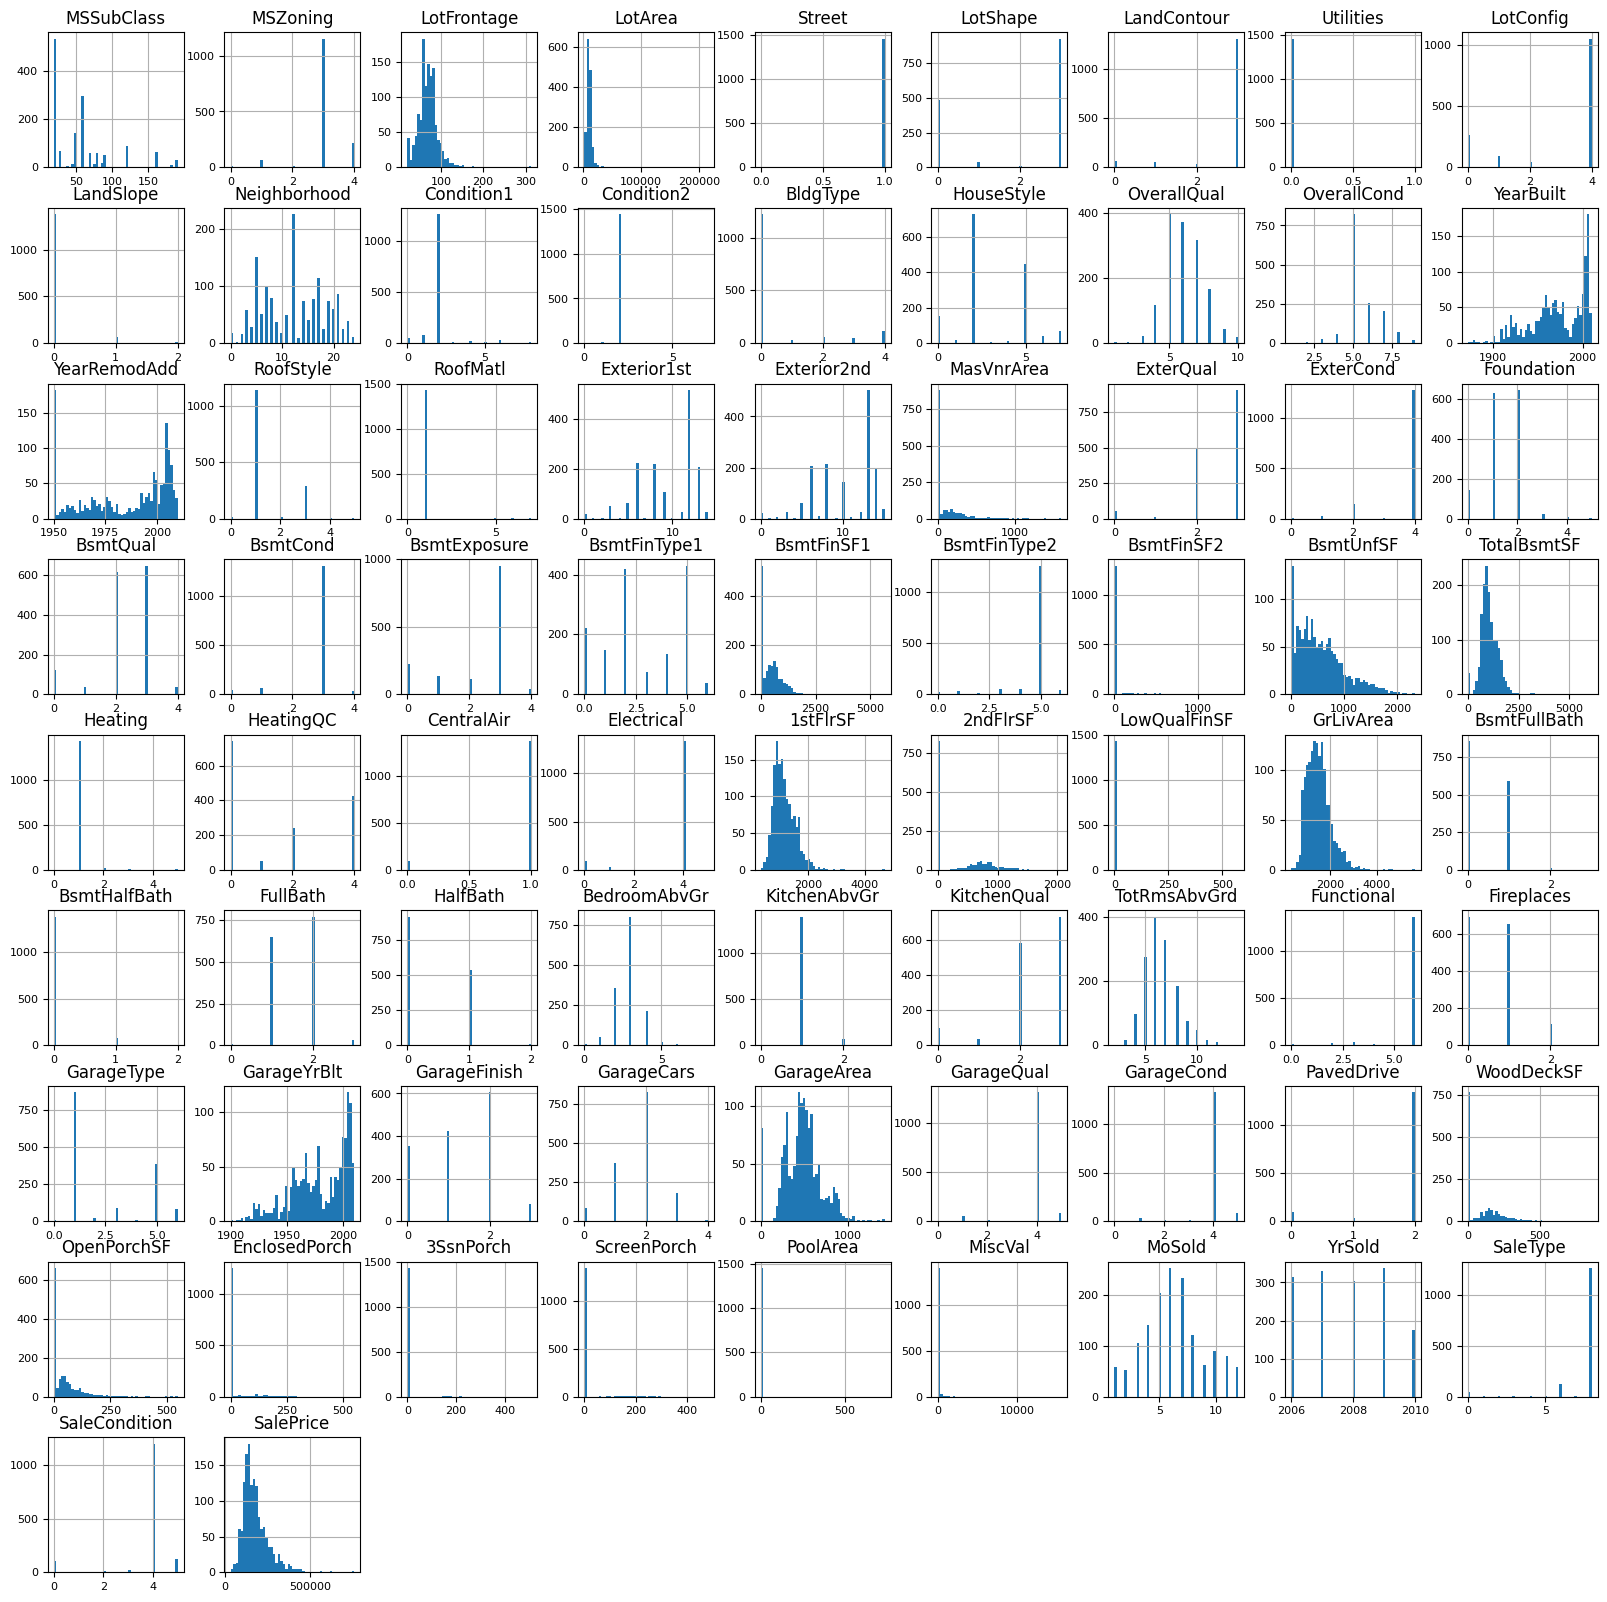

In [69]:
# Plot the histogram of each data
train_data.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

/tmp/ipython-input-1224507473.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], bins=100, color="blue")


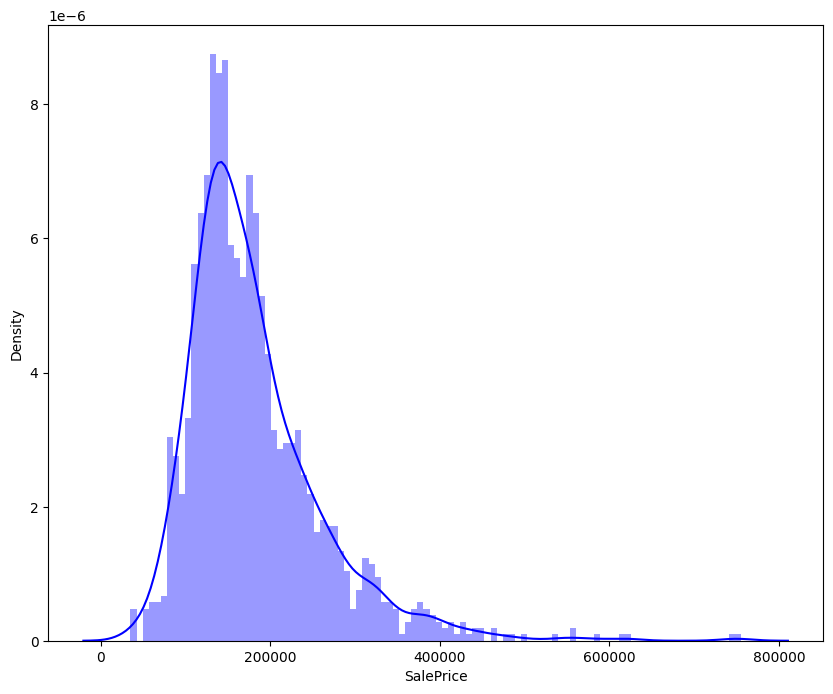

In [70]:
## Plot the distribution of the SalesPrice variable
plt.subplots(figsize=(10,8))
sns.distplot(train_data['SalePrice'], bins=100, color="blue")
plt.show()

In [96]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)


In [97]:
def boruta_model(X_train, y_train):
  np.random.seed(123)
  model_boruta = RandomForestRegressor(n_estimators = 500, bootstrap = True,
                                verbose = 1)
  np.random.seed(123)
  fs_boruta = BorutaPy(model_boruta, n_estimators = 'auto',
                        verbose = 1, random_state = 1, max_iter=50)
  fs_boruta.fit(X_train.values, y_train)
  feature_boruta = list(zip(cols, fs_boruta.ranking_, fs_boruta.support_))
  feature_boruta = pd.DataFrame(feature_boruta, columns = ['Feature', 'Rank', 'Keep'])
  feature_boruta2 = feature_boruta[feature_boruta['Keep']==True]
  return feature_boruta2

In [98]:
## Feature Selection using Boruta
np.random.seed(123)
model_boruta = RandomForestRegressor(n_estimators = 500, bootstrap = True,
                                verbose = 1, random_state = 0)
np.random.seed(123)
fs_boruta = BorutaPy(model_boruta, n_estimators = 'auto',
                        verbose = 1, random_state = 1, max_iter=50)
fs_boruta.fit(X_train.values, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.6s finished


Iteration: 1 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.2s finished


Iteration: 2 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.0s finished


Iteration: 3 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.6s finished


Iteration: 4 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    6.6s finished


Iteration: 5 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.8s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.6s finished


Iteration: 6 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    6.6s finished


Iteration: 7 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:    7.6s finished


Iteration: 8 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.5s finished


Iteration: 9 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.5s finished


Iteration: 10 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    3.1s finished


Iteration: 11 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    2.8s finished


Iteration: 12 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    2.3s finished


Iteration: 13 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    2.3s finished


Iteration: 14 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    2.3s finished


Iteration: 15 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  66 out of  66 | elapsed:    3.0s finished


Iteration: 16 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.5s finished


Iteration: 17 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.2s finished


Iteration: 18 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    2.2s finished


Iteration: 19 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 20 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.3s finished


Iteration: 21 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.9s finished


Iteration: 22 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 23 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 24 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 25 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 26 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.9s finished


Iteration: 27 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.3s finished


Iteration: 28 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 29 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 30 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 31 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.4s finished


Iteration: 32 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.9s finished


Iteration: 33 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 34 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 35 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 36 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 37 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    3.0s finished


Iteration: 38 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.3s finished


Iteration: 39 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 40 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 41 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 42 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.5s finished


Iteration: 43 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.8s finished


Iteration: 44 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.2s finished


Iteration: 45 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 46 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 47 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.1s finished


Iteration: 48 / 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.4s


Iteration: 49 / 50


BorutaPy finished running.

Iteration: 	50 / 50
Confirmed: 	15
Tentative: 	3
Rejected: 	52


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    3.1s finished


BorutaPy(estimator=RandomForestRegressor(n_estimators=63,
                                         random_state=RandomState(MT19937) at 0x7818241D7840,
                                         verbose=1),
         max_iter=50, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7818241D7840, verbose=1)

In [101]:
feature_boruta = list(zip(X_train.columns, fs_boruta.ranking_, fs_boruta.support_))
feature_boruta = pd.DataFrame(feature_boruta, columns = ['Feature', 'Rank', 'Keep'])
selected_feature = feature_boruta[feature_boruta['Keep']==True].Feature.to_numpy()
print("Selected Feature : ")
print(feature_boruta[feature_boruta['Keep']==True])


Selected Feature : 
         Feature  Rank  Keep
2        LotArea     1  True
9   Neighborhood     1  True
14   OverallQual     1  True
16     YearBuilt     1  True
17  YearRemodAdd     1  True
25      BsmtQual     1  True
29    BsmtFinSF1     1  True
33   TotalBsmtSF     1  True
38      1stFlrSF     1  True
39      2ndFlrSF     1  True
41     GrLivArea     1  True
44      FullBath     1  True
53  GarageFinish     1  True
54    GarageCars     1  True
55    GarageArea     1  True


In [103]:
X_train_boruta = X_train[selected_feature]
X_test_boruta = X_test[selected_feature]
test_boruta = test_data[selected_feature]

In [106]:
model_boruta = RandomForestRegressor(n_estimators = 500, random_state = 50)
model_boruta.fit(X_train_boruta, y_train)
y_pred_boruta = model_boruta.predict(X_test_boruta)

r2_boruta = r2_score(y_test, y_pred_boruta)
mae_boruta = mean_absolute_error(y_test, y_pred_boruta)
mse_boruta = mean_squared_error(y_test, y_pred_boruta)
rmse_boruta = np.sqrt(mse_boruta)
print("\nR2 : ", r2_boruta)
print("\nMAE : ", mae_boruta)
print("\nMSE : ", mse_boruta)
print("\nRMSE : ", rmse_boruta)


R2 :  0.9015717956564874

MAE :  17510.00078767123

MSE :  754976435.3024143

RMSE :  27476.834521145523


In [107]:
y_pred_boruta_test = model_boruta.predict(test_boruta)


In [112]:
output = pd.DataFrame({'Id': Id, 'SalePrice':y_pred_boruta_test})
output.to_csv('submission_house_price.csv', index=False)

print("✅Output is submited successfully!")


✅Output is submited successfully!


The file 'submission.csv' has been saved. You can download it from the file explorer on the left.